In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Amreli NRM data for model building2.csv')
df.columns

Index(['campaign', 'Heat number (life number)',
       'Total Heat Time previous (minutes)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy previous (KWH)', 'Input energy (KWH)', 'Previous Voltage',
       'Previous Frequency', 'Previous Rating of the Furnace', 'Voltage',
       'Frequency', 'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating',
       'Previous Input', 'Previous Output', 'Power', 'Power previous'],
      dtype='object')

In [3]:

campaign = np.unique(df['campaign'])

for c in campaign:
    dfc = df[df['campaign']==c]
    i = dfc.index[0]
    df = df.drop(i)
    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)
threshold = 150

for i in range(df.shape[0]):
    if(df.loc[i,'Total Heat Time previous (minutes)']>threshold):
        df.loc[i,'Total Heat Time previous (minutes)']= threshold
    if(df.loc[i,'Total Heat Time (minutes)']>threshold):
        df.loc[i,'Total Heat Time (minutes)']= threshold
        
df['Input energy previous (KWH)'] = df['Power previous']*df['Total Heat Time previous (minutes)']/60
df['Input energy (KWH)'] = df['Power']*df['Total Heat Time (minutes)']/60


In [4]:
df['Voltage'].describe()

count     440.000000
mean     3560.813636
std       171.152683
min      3063.000000
25%      3402.750000
50%      3580.000000
75%      3744.000000
max      3770.000000
Name: Voltage, dtype: float64

In [5]:
df['Input energy (KWH)']

0      45708.750000
1      37250.000000
2      29406.666667
3      33259.916667
4      29659.000000
           ...     
435    39504.833333
436    28407.500000
437    26759.250000
438    48270.500000
439    29146.333333
Name: Input energy (KWH), Length: 440, dtype: float64

In [7]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Input','Previous Voltage', 'Total Heat Time previous (minutes)',
                 'Previous Frequency','Previous Rating of the Furnace','Previous Output', 'Refractory lining before heating','Number of capacitors removed','Tapping Temperature (C)','Input energy previous (KWH)']
# output_columns = ['Inverse Efficiency (KWH/MT)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']
output_columns = ['Voltage','Frequency','Refractory lining after heating']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

for i in range(3):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

for i in range(lr.coef_.shape[0]):
    for j in range(lr.coef_.shape[1]):
        print("Weight of {} on {} is {}".format(input_columns[j], output_columns[i],lr.coef_[i][j]))
    print('\n')

Voltage
Train score is 5295.652045389165
Test score is 4970.4846643132705
R2 score is 0.8536957738548989
Train NMSE score is 19.336936508888204
Test NMSE score is 14.630422614510104
Frequency
Train score is 24.90273208224797
Test score is 34.390054509869394
R2 score is 0.9569968011648873
Train NMSE score is 3.05361731894913
Test NMSE score is 4.300319883511274
Refractory lining after heating
Train score is 5.35341880495126e-05
Test score is 0.00015821507202287593
R2 score is 0.9997556153790689
Train NMSE score is 0.008361390672934269
Test NMSE score is 0.024438462093111676
Weight of Scrap (MT) on Voltage is -7.454802919106149
Weight of Sponge (MT) on Voltage is -5.24266072997013
Weight of Hot Heel (MT) on Voltage is 5.171418848703979e-12
Weight of Alloys (MT) on Voltage is -70.11007024975203
Weight of Previous Input on Voltage is 2.6040373424952583
Weight of Previous Voltage on Voltage is 0.3330520244705708
Weight of Total Heat Time previous (minutes) on Voltage is -0.041835249285154
W

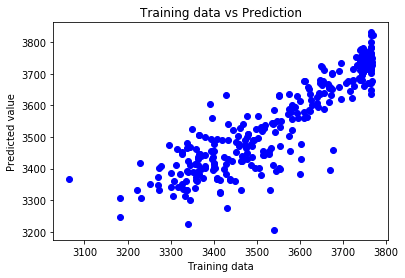

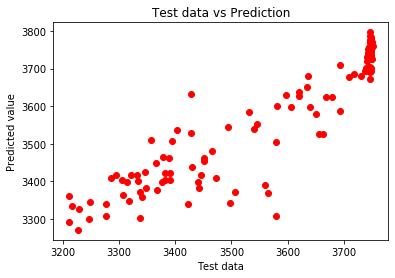

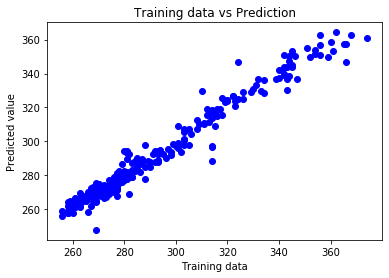

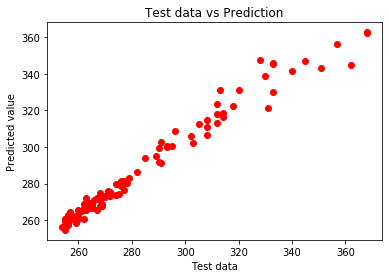

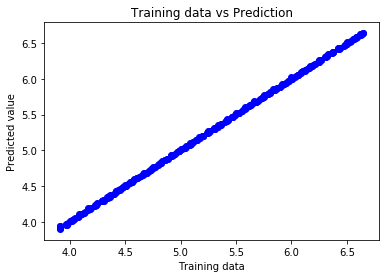

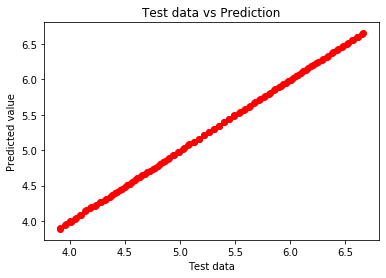

In [8]:
for i in range(3):
    plt.scatter(y_train[:,i], y_pred_train[:,i], c='b');
    plt.xlabel('Training data')
    plt.ylabel('Predicted value')
    plt.title('Training data vs Prediction')
    plt.show()
    plt.scatter(y_test[:,i], y_pred_test[:,i], c='r');
    plt.xlabel('Test data')
    plt.ylabel('Predicted value')
    plt.title('Test data vs Prediction')
    plt.show()

In [10]:
import pickle
pickle.dump(lr, open('C:/Users/DSNikhil/Downloads/Project work/Phase 1 summary/lin_model.pkl', 'wb'))